In [1]:
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
%pylab inline
plt.rc('figure', figsize = [16, 6])
plt.rc('font', size = 20)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read irregular ASCII tabular file of history of VCHP control
htrfile = "/Users/rc/Documents/GLAST/ISOC/LATmetrics/LTC/htr.history"
df = pd.read_csv(htrfile, parse_dates=[1], delimiter="\t",header=None)
(ymd,tot0,off0,tot6,off6,tot7,off7) = (df[0],df[2],df[3],df[5],df[6],df[8],df[9])

'2008-6-24'

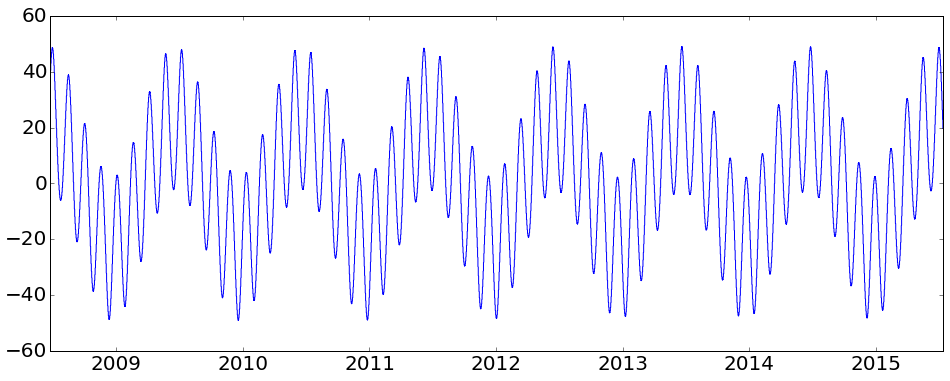

In [3]:
# read regular ASCII tabular file of beta angle history
betafile = "/Users/rc/Documents/GLAST/ISOC/LATmetrics/LTC/betaangle.txt"
yb,mb,db,doyb,hb,minb,sb,s01,rau,beta = np.loadtxt(betafile, unpack=True)
bymd = []
for i in range(len(yb)):
    bymd.append(str(int(yb[i]))+'-'+str(int(mb[i]))+'-'+str(int(db[i])))
bx = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in bymd]
plt.plot(bx,beta)
bymd[0]

In [4]:
ok = (tot0 > 0) & (tot6 > 0) & (tot7 > 0)

In [5]:
ymd = ymd[ok]
tot0 = tot0[ok]
off0 = off0[ok]
tot6 = tot6[ok]
off6 = off6[ok]
tot7 = tot7[ok]
off7 = off7[ok]
f0 = off0/tot0
f6 = off6/tot6
f7 = off7/tot7
VCHP0 = 1-pd.rolling_window(f0,20,win_type='boxcar',center='True')
VCHP6 = 1-pd.rolling_window(f6,20,win_type='boxcar',center='True')
VCHP7 = 1-pd.rolling_window(f7,20,win_type='boxcar',center='True')

In [6]:
fx = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in ymd]

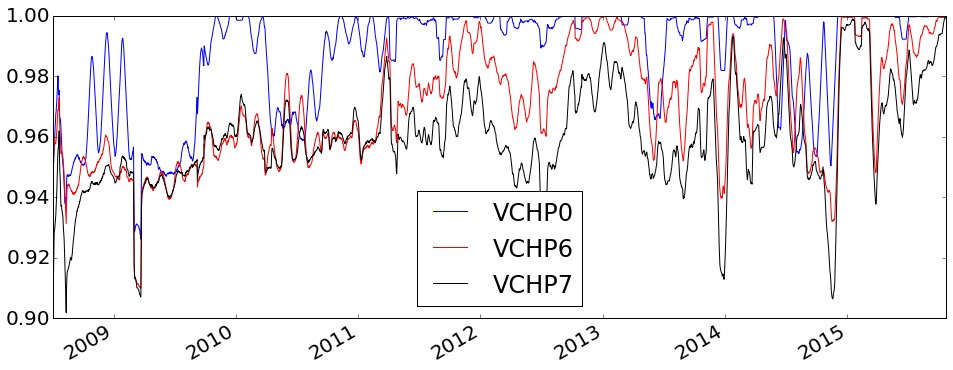

In [7]:
import matplotlib.dates as mdates

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(fx,VCHP0,'-b',label='VCHP0')
plt.plot(fx,VCHP6,'-r',label='VCHP6')
plt.plot(fx,VCHP7,'-k',label='VCHP7')
plt.ylim(0.9,1.0)
#plt.text(0.5,0.5,'VHCP0',color='b',xycoords=u'axes fraction')
#plt.xlim(8.0,16.0)
plt.gcf().autofmt_xdate()
plt.legend(loc='lower center')